In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ajayisabitch
import seaborn as sns
import pickle

In [2]:
raw_data=pd.read_csv("diabetes.csv")
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
raw_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

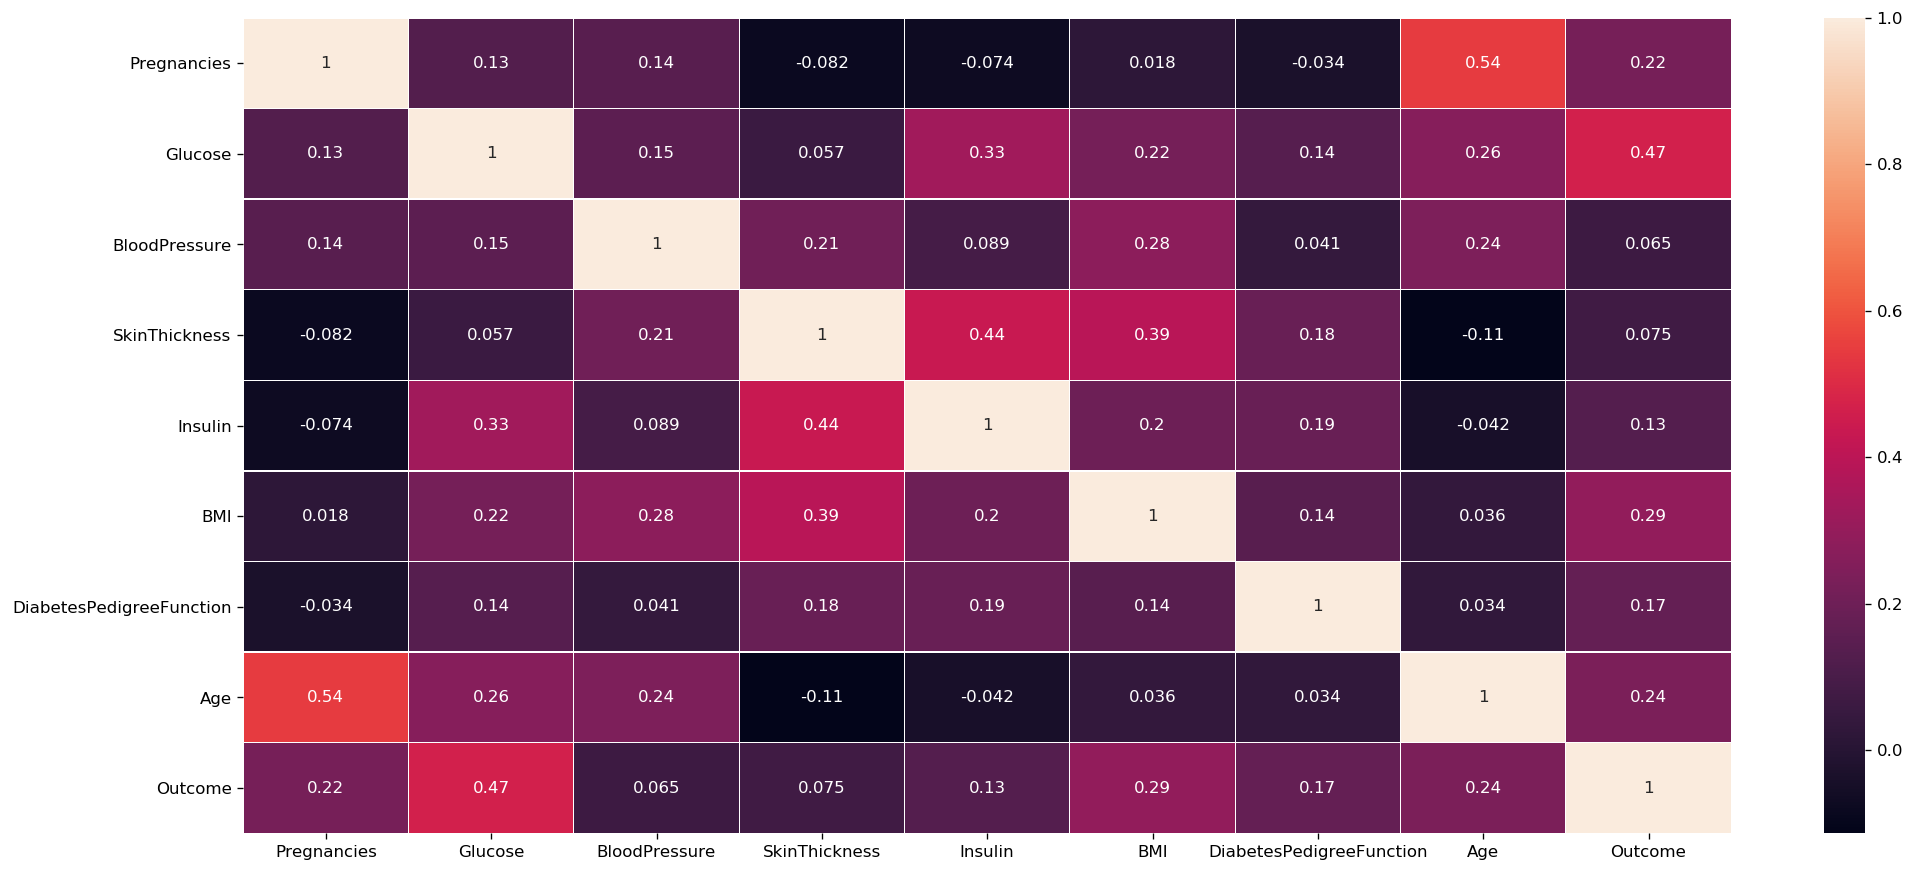

In [4]:
ajayisabitch.figure(dpi=120,figsize=(20,9))
a=raw_data.corr()
sns.heatmap(a,annot=True,linewidths=0.2) 

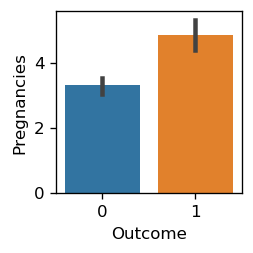

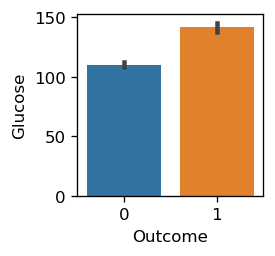

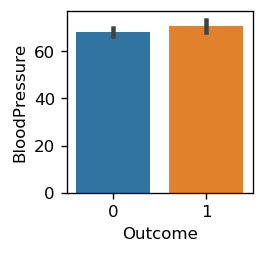

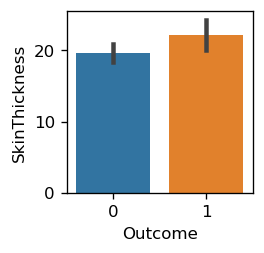

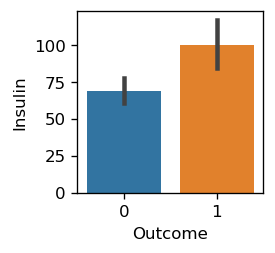

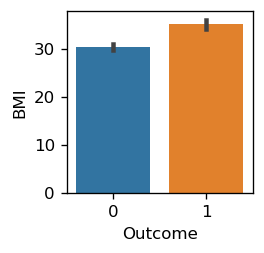

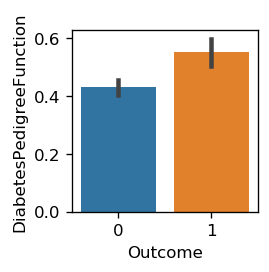

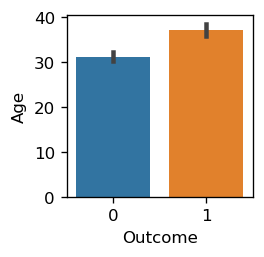

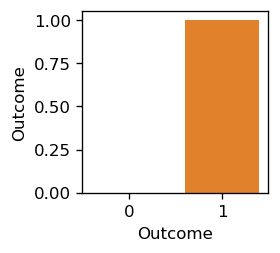

In [5]:
colums=list(raw_data.columns)
for i in colums:
    ajayisabitch.figure(figsize=(2,2),dpi=120)
    sns.barplot(x="Outcome",y=i,data=raw_data)

In [6]:
colums=list(raw_data.columns)
for i in colums:
    print("___________________________________________")
    print(i)
    print(raw_data[i].value_counts())
    print("___________________________________________")

___________________________________________
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
___________________________________________
___________________________________________
Glucose
100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
___________________________________________
___________________________________________
BloodPressure
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40 

In [7]:
data=raw_data.sample(frac=1).reset_index(drop=True)

In [8]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
train_x,test_x,train_y,test_y=tts(x,y,random_state=56,stratify=y,test_size=0.30)

In [11]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

In [12]:
train_x=scaler.fit_transform(train_x)

In [13]:
test_x=scaler.fit_transform(test_x)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [15]:
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
lr.score(train_x,train_y)

0.7728119180633147

In [17]:
lr.score(test_x,test_y)

0.7489177489177489

In [18]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(max_depth=7)

#for i in range(1,50):
 #   rf=RandomForestClassifier(max_depth=i)
  #  print(i)
   # rf.fit(train_x,train_y)
    #print("____________________")
    #print(rf.score(train_x,train_y))
    #print("____________________")
    #print(rf.score(test_x,test_y))
    #print("____________________")

In [19]:
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rf.score(train_x,train_y)

0.9478584729981379

In [21]:
rf.score(test_x,test_y)

0.7316017316017316

In [26]:
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[8,2,32,34,6,78,9, 9]]))

[0]
